#**Cheat sheet**

In [ ]:
# Adatok beolvasása CSV fájlból Pandas DataFrame-be
import pandas as pd
dataframe = pd.read_csv('file.csv')

# Adatok beolvasása URL-ről Pandas DataFrame-be
import pandas as pd
dataframe = pd.read_csv('http://url/file.csv')

# Adatok NumPy tömbbé alakítása
import pandas as pd
data = dataframe.values

# Címkék kinyerése az utolsó oszlopból
labels = data[:, -1]

# Adatok kinyerése az összes oszlopból, kivéve az utolsót
data = data[:, 0:-1]

# Adatok felosztása tréning és teszt halmazokra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=21)

# Adatok normalizálása [0, 1] intervallumra TensorFlow-val
import tensorflow as tf
min_val = tf.reduce_min(X_train)
max_val = tf.reduce_max(X_train)
X_train = (X_train - min_val) / (max_val - min_val)
X_test = (X_test - min_val) / (max_val - min_val)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Adattípus konvertálása float32-re TensorFlow-val
import tensorflow as tf
X_train = tf.cast(X_train, tf.float32)
X_test = tf.cast(X_test, tf.float32)

# Logikai tömbbé alakítás
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

# Normál adatok szűrése logikai indexeléssel
normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

# Anomáliás adatok szűrése negált logikai indexeléssel
anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

# Egyedi értékek megszámlálása egy NumPy tömbben
import numpy as np
unique, counts = np.unique(y, return_counts=True)

# One-hot kódolás Keras-szal
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


# Szekvenciális modell létrehozása Keras-szal
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential()

# Sűrű réteg hozzáadása a modellhez
model.add(layers.Dense(units=64, activation='relu', input_shape=[input_dim]))

# Dropout réteg hozzáadása
model.add(layers.Dropout(rate=0.3))

# Batch normalizáció hozzáadása
model.add(layers.BatchNormalization())

# Kimeneti réteg hozzáadása regresszióhoz
model.add(layers.Dense(units=1))

# Kimeneti réteg hozzáadása bináris osztályozáshoz
model.add(layers.Dense(units=1, activation='sigmoid'))

# Kimeneti réteg hozzáadása többosztályos osztályozáshoz
model.add(layers.Dense(units=num_classes, activation='softmax'))

# Modell fordítása regresszióhoz
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Modell fordítása bináris osztályozáshoz
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modell fordítása többosztályos osztályozáshoz
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Korai leállítás visszahívás definiálása
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True)

# Modell illesztése tréning adatokra, validációval és korai leállítással
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=256, epochs=500, callbacks=[early_stopping], verbose=1)

# Tanulási görbék ábrázolása
import pandas as pd
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

# Modell kiértékelése teszt adatokon
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Előrejelzés készítése új adatokon
predictions = model.predict(X_new)

# Modell mentése
model.save("my_model.h5")

# Modell betöltése
from tensorflow import keras
model = keras.models.load_model("my_model.h5")




---

# **1.Feladat**
**Regresszió**

---



In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers, callbacks

# Adatok betöltése és előkészítése

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - loss: 22.3903 - mae: 22.3903 - val_loss: 21.3027 - val_mae: 21.3027
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 21.3550 - mae: 21.3550 - val_loss: 19.3188 - val_mae: 19.3188
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 19.1887 - mae: 19.1887 - val_loss: 15.4698 - val_mae: 15.4698
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 14.7490 - mae: 14.7490 - val_loss: 10.6214 - val_mae: 10.6214
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 9.6924 - mae: 9.6924 - val_loss: 11.0171 - val_mae: 11.0171
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 10.8787 - mae: 10.8787 - val_loss: 11.7804 - val_mae: 11.7804
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 10.9181 - mae: 10.9181 - val_loss: 8.6864 - val_mae: 8.6864
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 7.9183 - mae: 7.9183 - val_loss: 8.1603 - val_mae: 8.1603
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/ste

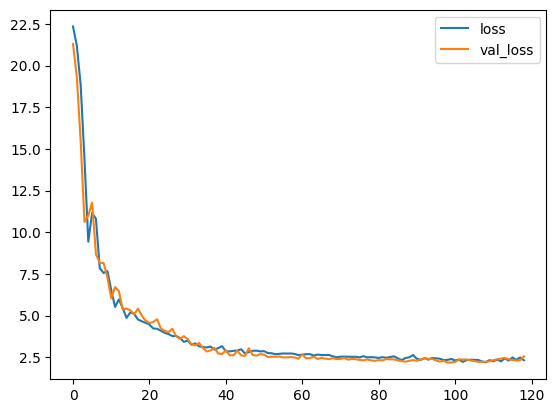

In [ ]:
# Adatok felosztása tréning és teszt halmazokra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Adatok normalizálása [0, 1] intervallumra TensorFlow-val
import tensorflow as tf
min_val = tf.reduce_min(X_train)
max_val = tf.reduce_max(X_train)
X_train = (X_train - min_val) / (max_val - min_val)
X_test = (X_test - min_val) / (max_val - min_val)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Szekvenciális modell létrehozása Keras-szal
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential()


model = keras.Sequential([
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='linear'),
])

model.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Korai leállítás visszahívás definiálása
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(min_delta=0.005, patience=20, restore_best_weights=True)

# Modell illesztése tréning adatokra, validációval és korai leállítással
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=256, epochs=500, callbacks=[early_stopping], verbose=1)

# Tanulási görbék ábrázolása
import pandas as pd
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();



---

# **2.Feladat**
**Kategórikus osztályozás teljesen összekötött rétegekkel**

---



In [ ]:
from tensorflow import keras
(X_train, y_train), (X_test,y_test) = keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1,784).astype(float)/255.0
X_test = X_test.reshape(-1,784).astype(float)/255.0
y_train = keras.utils.to_categorical(y_train, num_classes = 10)
y_test = keras.utils.to_categorical(y_test, num_classes = 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8314 - loss: 0.5456 - val_accuracy: 0.9684 - val_loss: 0.1091
Epoch 2/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9614 - loss: 0.1208 - val_accuracy: 0.9736 - val_loss: 0.0837
Epoch 3/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9754 - loss: 0.0792 - val_accuracy: 0.9769 - val_loss: 0.0730
Epoch 4/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9806 - loss: 0.0609 - val_accuracy: 0.9762 - val_loss: 0.0789
Epoch 5/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9839 - loss: 0.0516 - val_accuracy: 0.9796 - val_loss: 0.0689
Epoch 6/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9853 - loss: 0.0450 - val_accuracy: 0.9794 - val_loss: 0.0771
Epoch 7/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9861 - loss: 0.0446 - val_accuracy: 0.9776 - val_loss: 0.0748
Epoch 8/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9878 - loss: 0.0367 - val_acc

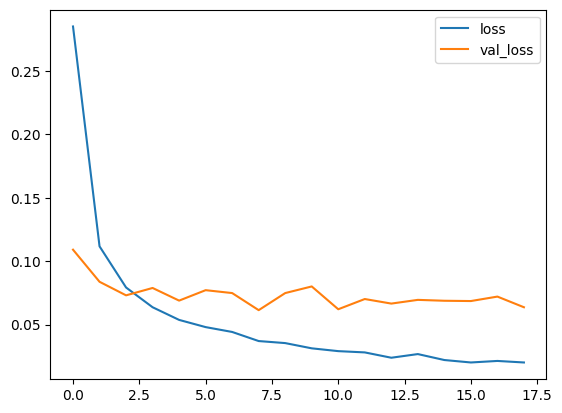

In [ ]:
# Szekvenciális modell létrehozása Keras-szal
from tensorflow import keras
from tensorflow.keras import layers
model_2 = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape = (784,)),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax'),
])


# Modell fordítása többosztályos osztályozáshoz
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Korai leállítás visszahívás definiálása
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(min_delta=0.005, patience=10, restore_best_weights=True)

# Modell illesztése tréning adatokra, validációval és korai leállítással
history_2 = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=256, epochs=500, callbacks=[early_stopping], verbose=1)

history_df = pd.DataFrame(history_2.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

## **Tesztelés egy véletlenszerű képre**

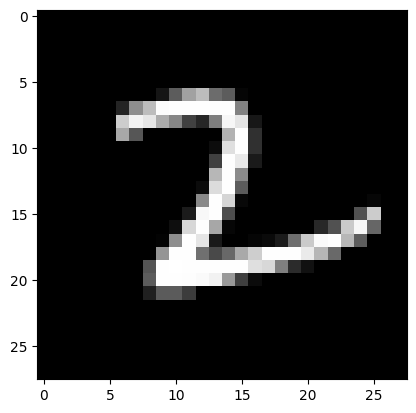

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
True label: 2
Predicted class: 2


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

random_index = random.randint(0, len(X_test) - 1)

test = X_test[random_index].reshape(1, 784)
plt.imshow(test.reshape(28, 28), cmap='gray')
plt.show()

pred = model_2.predict(test)
true_label = np.argmax(y_test[random_index])
print(f"True label: {true_label}")

predicted_class = np.argmax(pred)
print(f"Predicted class: {predicted_class}")





---

# **3.Feladat**
**Autoencoder**

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from tensorflow import keras
from tensorflow.keras import regularizers,losses,layers
from keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score


# --- Adatok generálása ---

# Véletlenszerű adatok generálása (szintetikus bankkártya tranzakciók)
np.random.seed(42)  # Reprodukálhatóság miatt
n_samples = 1000
n_features = 5  # Pl.: összeg, időpont, helyszín (kódolva), kereskedő (kódolva), tranzakció típusa (kódolva)

normal_transactions = np.random.rand(n_samples, n_features) * 10  # Normál tranzakciók
fraudulent_transactions = np.random.rand(int(n_samples * 0.05), n_features) * 10 + 5 # Csalások, kicsit eltolva az értékek

data = np.concatenate([normal_transactions, fraudulent_transactions])
labels = np.array([0] * len(normal_transactions) + [1] * len(fraudulent_transactions))

In [ ]:
import tensorflow as tf

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21,
)

min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[~train_labels]
normal_test_data = test_data[~test_labels]

anomalous_train_data = train_data[train_labels]
anomalous_test_data = test_data[test_labels]

print(len(normal_train_data))
print(len(anomalous_test_data))

799
9


Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0652 - val_loss: 0.0487
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0408 - val_loss: 0.0413
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0326 - val_loss: 0.0380
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0315 - val_loss: 0.0356
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0274 - val_loss: 0.0318
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0249 - val_loss: 0.0288
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0218 - val_loss: 0.0266
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0208 - val_loss: 0.0247
Epoch 9/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0190 - val_loss: 0.0229
Epoch 10/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0174 - val_loss: 0.0217
Epoch 11/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0164 - val_loss: 0.0207
Epoch 12/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0

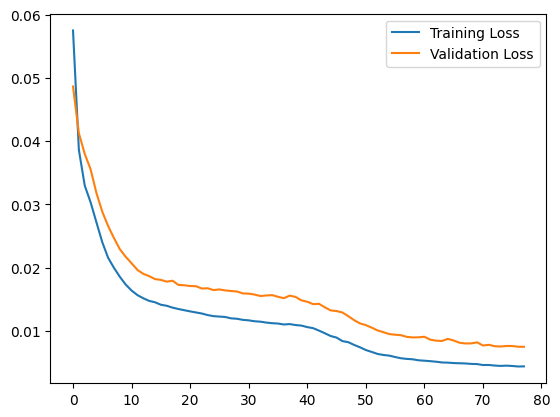

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Define the autoencoder model
autoencoder = keras.Sequential([
    layers.Dense(64, activation="relu", kernel_initializer='he_normal', input_shape=(5,)),
    layers.Dense(16, activation="relu", kernel_initializer='he_normal'),
    layers.Dense(4, activation="relu", kernel_initializer='he_normal'),  # Smaller bottleneck
    layers.Dense(16, activation="relu", kernel_initializer='he_normal'),
    layers.Dense(64, activation="relu", kernel_initializer='he_normal'),
    layers.Dense(5, activation="sigmoid")
])

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Implement early stopping
early_stopping = EarlyStopping(min_delta=0.001, patience=10, restore_best_weights=True)

# Train the model
history = autoencoder.fit(normal_train_data, normal_train_data,
                          epochs=1000,
                          batch_size=32,
                          validation_data=(test_data, test_data),
                          shuffle=True,
                          callbacks=[early_stopping])

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [ ]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mse(reconstructions, data)
  return ~tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [ ]:
reconstructions_normal = autoencoder.predict(normal_test_data) # a teszt halmazra elkészítjük a 'predikciókat' visszaállított adatokat
train_loss = tf.keras.losses.mse(reconstructions_normal, normal_test_data) # majd kiszámítjuk ezek átlagos abszolút hibáit

reconstructions_anom = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mse(reconstructions_anom, anomalous_test_data)

print(train_loss)
print("asdas")
print(test_loss)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
tf.Tensor(
[0.00132633 0.00429241 0.00336486 0.0099245  0.00575379 0.0042542
 0.00416548 0.00485032 0.00173342 0.00248041 0.00085014 0.00918444
 0.00036529 0.00184674 0.00073457 0.00080092 0.00265634 0.00290411
 0.00554923 0.00695891 0.00427968 0.00175425 0.01082201 0.00138308
 0.00431601 0.00286385 0.01438528 0.00062853 0.00075428 0.00282176
 0.00214925 0.00754099 0.00349898 0.00070189 0.00946676 0.01037794
 0.00037472 0.06797501 0.000664   0.00052067 0.00188516 0.01415601
 0.0010189  0.00039055 0.00703031 0.00218372 0.00025833 0.0134585
 0.00080196 0.0006815  0.00793174 0.00147162 0.01243927 0.00329794
 0.00030103 0.00184775 0.00411694 0.00098567 0.00082456 0.00027834
 0.00182913 0.00363898 0.0518348  0.01178561 0.00695577 0.01109592
 0.00148685 0.0052389  0.00527463 0.0024823  0.00194744 0.00338951
 0.00498531 0.0069763  0.00076025 0.00146724 0.03089796 0.00598061
 0.01060989 0.00185727 0.0004921  0.00324938

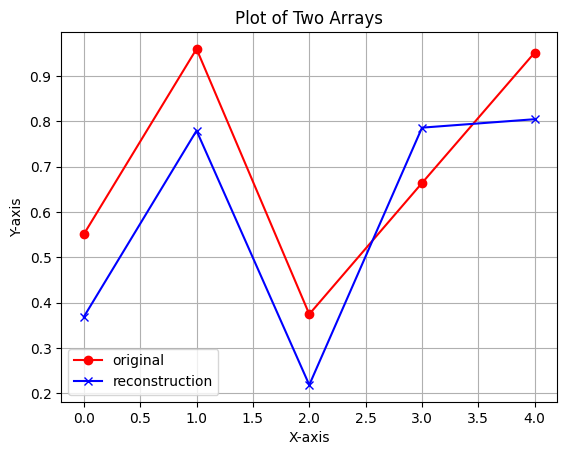

In [ ]:
import matplotlib.pyplot as plt

r = reconstructions_anom[4]

o = anomalous_test_data[4]

# Plot the first array
plt.plot([i for i in range(5)], o, marker='o', label='original', color='r')

# Plot the second array
plt.plot([i for i in range(5)], r, marker='x', label='reconstruction', color='b')

# Add titles and labels
plt.title('Plot of Two Arrays')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add a legend
plt.legend()

# Show the grid
plt.grid()

# Show the plot
plt.show()


Threshold:  0.04027590109035373


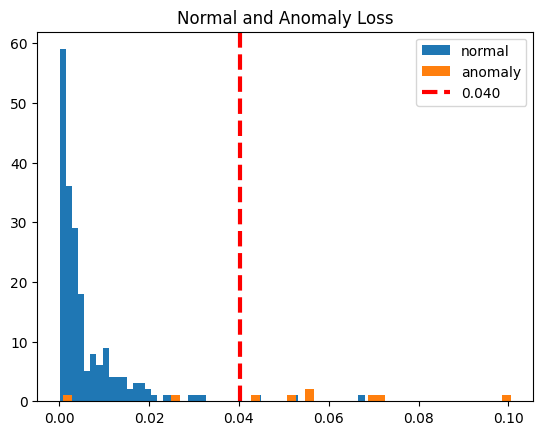

In [ ]:
threshold = np.mean(train_loss) + 4 * np.std(train_loss)
print("Threshold: ", threshold)

plt.hist(train_loss, bins=50, label='normal')
plt.hist(test_loss, bins=50, label='anomaly')
plt.axvline(threshold, color='r', linewidth=3, linestyle='dashed', label='{:0.3f}'.format(threshold))
plt.legend(loc='upper right')
plt.title("Normal and Anomaly Loss")
plt.show()

In [ ]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.9761904761904762
Precision = 0.7
Recall = 0.7777777777777778
